In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam
from keras.regularizers import l2
from keras.utils import np_utils
%matplotlib inline

In [10]:
train_ds = tf.data.Dataset.load('D:\RandomGits\Facial-Expression-Recognition\datasets\\augmented_train_ds')
validation_ds = tf.data.Dataset.load('D:\RandomGits\Facial-Expression-Recognition\datasets\\augmented_validation_ds')

In [11]:
# train_ds = train_ds.batch(64)
# validation_ds = validation_ds.batch(64)
img, label = next(train_ds.as_numpy_iterator())

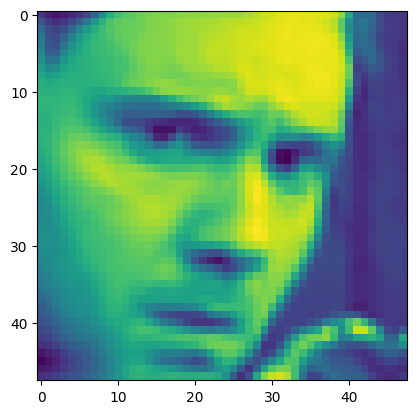

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [12]:
plt.imshow(img[0])
plt.show()
print(label)
print(img)

In [13]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(128,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 256)      

In [14]:
#Compliling the model
# model.compile(loss=categorical_crossentropy,
#               optimizer=Adam(),
#               metrics=['accuracy'])

#Training the model
# train_ds = train_ds.shuffle(1000, reshuffle_each_iteration=True)
history = model.fit(train_ds,
          batch_size=64,
          epochs=50,
          verbose=1,
          validation_data=(validation_ds),
          shuffle=True)


Epoch 1/50
1118/1118 [==============================] - 75s 65ms/step - loss: 1.7673 - accuracy: 0.3293 - val_loss: 1.6634 - val_accuracy: 0.3644
Epoch 2/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.5512 - accuracy: 0.4175 - val_loss: 1.5634 - val_accuracy: 0.4061
Epoch 3/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.4203 - accuracy: 0.4658 - val_loss: 1.4301 - val_accuracy: 0.4624
Epoch 4/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.3058 - accuracy: 0.5121 - val_loss: 1.3018 - val_accuracy: 0.4939
Epoch 5/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.2302 - accuracy: 0.5393 - val_loss: 1.2850 - val_accuracy: 0.5096
Epoch 6/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.1730 - accuracy: 0.5657 - val_loss: 1.2689 - val_accuracy: 0.5301
Epoch 7/50
1118/1118 [==============================] - 71s 63ms/step - loss: 1.1228 - accuracy: 0.5845 - val_loss: 1.1855 -

In [15]:
loss = model.evaluate(validation_ds)
print('Test loss:', loss)

114/114 [==============================] - 2s 16ms/step - loss: 1.8311 - accuracy: 0.6015
Test loss: [1.8311011791229248, 0.6014861464500427]


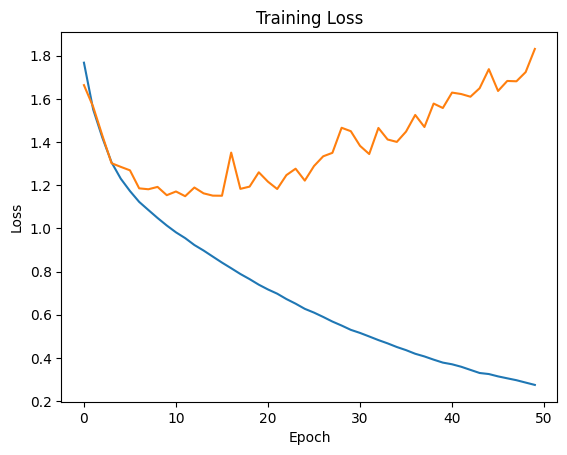

In [16]:
# plot the training loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [13]:
import numpy as np

In [17]:
np.argmax(model.predict(next(validation_ds.as_numpy_iterator())[0]), axis=1)

2/2 [==============================] - 0s 122ms/step


array([0, 3, 0, 4, 3, 6, 2, 4, 4, 3, 4, 0, 0, 2, 6, 0, 5, 5, 5, 3, 6, 5,
       3, 4, 0, 0, 4, 4, 2, 5, 3, 6, 3, 6, 0, 2, 6, 2, 6, 3, 0, 4, 0, 4,
       6, 0, 5, 3, 5, 6, 0, 3, 5, 4, 4, 3, 4, 0, 5, 3, 6, 3, 4, 3],
      dtype=int64)